IMPORTING BASIC PACKAGES

In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

IMPORTING IMAGE

In [ ]:
img = cv.imread('/content/drive/My Drive/SAMPLE_DATA/image_seg/strawberry.jpeg')
img.shape

(192, 263, 3)

TRYING TO DIRECTLY SEGMENT STRAWBERRY

In [ ]:
red=(img[:,:,2]>250).astype(int)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

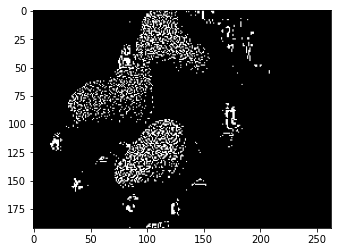

In [ ]:
plt.imshow(red,cmap='gray')

Image segmentation using bool could not completely remove filgers

TRYING DIFFERENT THRESHOLDING TECHNIQUE


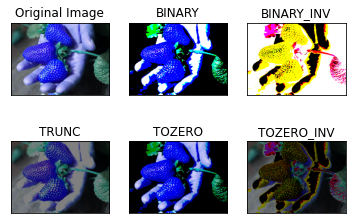

In [ ]:
ret,thresh1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(img,127,255,cv.THRESH_BINARY_INV)
ret,thresh3 = cv.threshold(img,127,255,cv.THRESH_TRUNC)
ret,thresh4 = cv.threshold(img,127,255,cv.THRESH_TOZERO)
ret,thresh5 = cv.threshold(img,127,255,cv.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

trying to highlight the strawberry

In [ ]:
ret2,thresh2 = cv.threshold(img,250,255,cv.THRESH_BINARY_INV)
ret4,thresh4 = cv.threshold(img,127,255,cv.THRESH_TRUNC)
pict=thresh2-thresh4

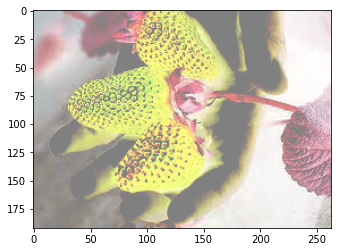

In [ ]:
plt.imshow(pict)

finding approx threshold

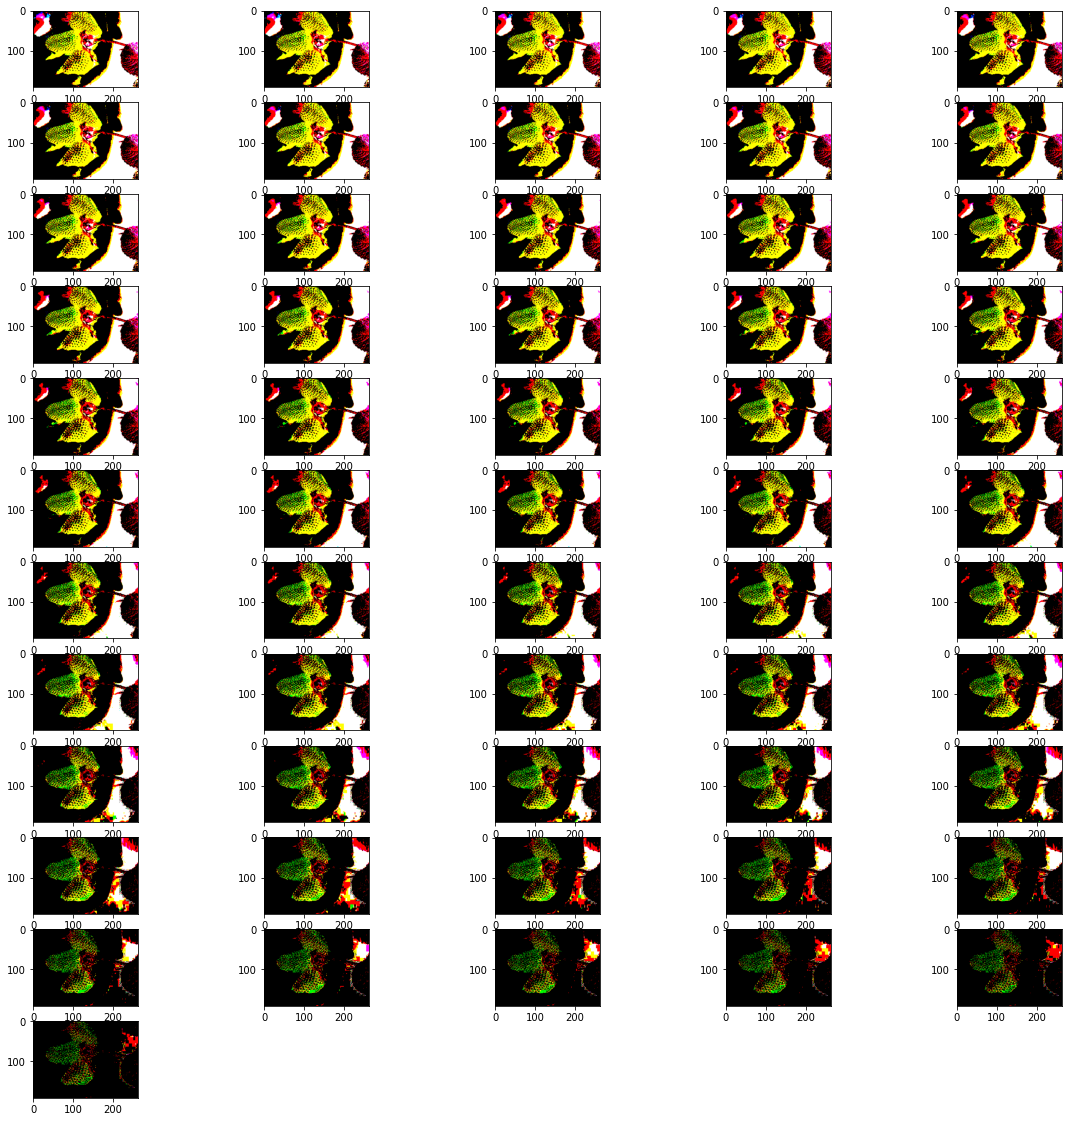

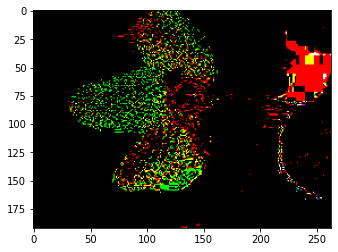

In [ ]:
plt.figure(figsize=(20,20))
for i in range(56):

    plt.subplot(12,5,i+1)
    straw=((pict>199+i).astype(int))*255
    plt.imshow(straw)

plt.show()

straw=((pict>253).astype(int))*255
plt.imshow(straw)

ADAPTIVE THRESHOLDING

In [ ]:
red=img[:,:,2]

th2 = cv.adaptiveThreshold(red,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,11,2)

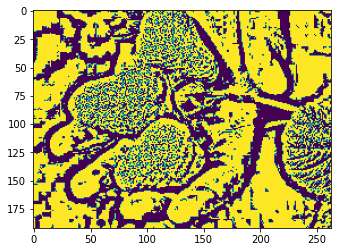

In [ ]:
plt.imshow(th2)

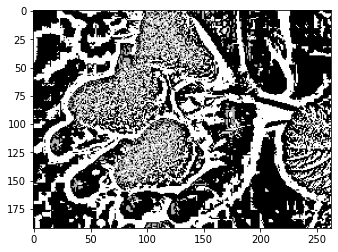

In [ ]:
gray = cv.cvtColor(thresh2, cv.COLOR_BGR2GRAY)
next=gray-th2-th2
plt.imshow(next,cmap='gray')

In [ ]:
img.shape

(192, 263, 3)

In [ ]:
ret, otsu = cv.threshold(red,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

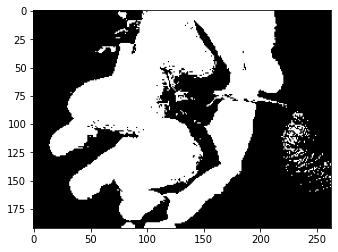

In [ ]:
plt.imshow(otsu,cmap='gray')

trying to remove stars

importing picture

In [ ]:
star=cv.imread('/content/stars.png')

In [ ]:
star.shape

(525, 700, 3)

In [ ]:
gray_star=cv.cvtColor(star, cv.COLOR_BGR2GRAY)

In [ ]:
star_flat=star.flatten()
star_flat

array([81, 59,  9, ...,  0,  0,  0], dtype=uint8)

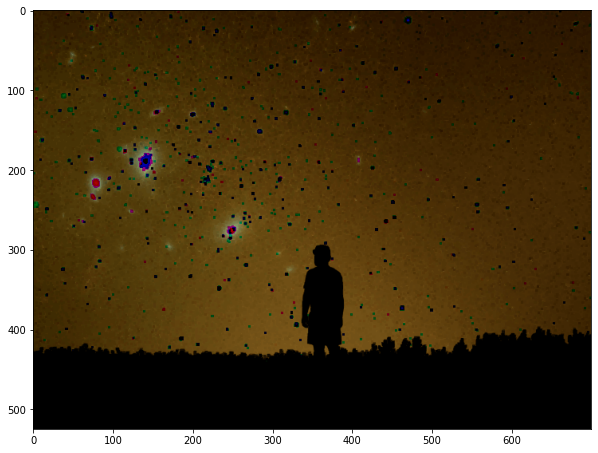

In [ ]:
star_flat=star.flatten()
star_flat
thresh=200


for i in range(len(star_flat)):
    if star_flat[i]>thresh:
        star_flat[i]=0

starless=star_flat.reshape(525, 700, 3)
plt.figure(figsize=(10,10))
plt.imshow(starless)
kernel = np.ones((3,3), np.uint8)
img_dilation = cv.erode(starless,kernel)
img+
plt.imshow(img_dilation)




In [ ]:
ret, otsu = cv.threshold(gray_star,0,255,cv.THRESH_TRUNC+cv.THRESH_OTSU)

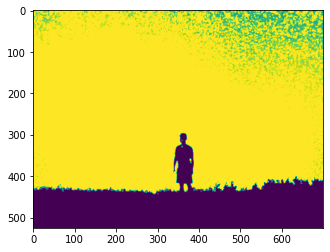

In [ ]:
kernel = np.ones((3,3), np.uint8)
img_dilation = cv.dilate(otsu,kernel)
kernel = np.ones((5,5), np.uint8)
img_erode=cv.erode(img_dilation,kernel)
plt.imshow(img_dilation)

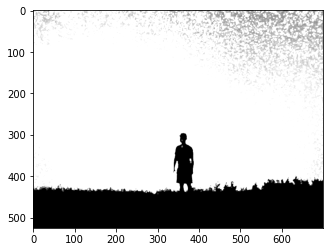

In [ ]:
plt.imshow(img_dilation,cmap='gray')

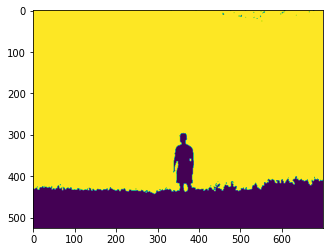

In [ ]:
ret2,thresh2 = cv.threshold(img_dilation,20,255,cv.THRESH_BINARY)
plt.imshow(thresh2)

In [ ]:

blur = cv.GaussianBlur(img_dilation,(3,3),0)

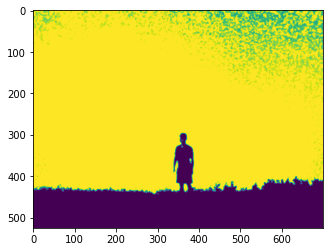

In [ ]:

plt.imshow(blur)